In [107]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [2]:
data=pd.read_csv("D:/data analysis class/HousePrices.csv")

In [3]:
data.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
null=data.loc[:,data.isna().any()]

In [5]:
null.head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [25]:
data.interpolate(method='linear', axis=0,limit_direction='both',inplace=True)

In [75]:
data.loc[:,data.isna().any()]

""
0
1
2
3
4
...
2068
2069
2070
2071


In [27]:
data.Alley.mode()

0    Gvrl
dtype: object

In [28]:
data.Alley.fillna('Gvrl',inplace=True)

In [29]:
data.FireplaceQu.mode()

0    Gd
dtype: object

In [30]:
data.FireplaceQu.fillna('Gd',inplace=True)

In [31]:
data.PoolQC.mode()

0    Ex
dtype: object

In [17]:
data.PoolQC.fillna('Ex',inplace=True)

In [18]:
data.Fence.mode()

0    MnPrv
dtype: object

In [19]:
data.Fence.fillna('MnPrv',inplace=True)

In [20]:
data.MiscFeature.mode()

0    Shed
dtype: object

In [21]:
data.MiscFeature.fillna('Shed',inplace=True)

In [38]:
data.drop('MasVnrType',axis=1,inplace=True)

In [39]:
data.Fence.mode()

0    MnPrv
dtype: object

In [40]:
data.Fence.fillna('MnPrv',inplace=True)

In [44]:
data.BsmtQual.mode()

0    Gd
dtype: object

In [45]:
data.BsmtQual.fillna('Gd',inplace=True)

In [48]:
data.BsmtCond.mode()

0    TA
dtype: object

In [49]:
data.BsmtCond.fillna('TA',inplace=True)

In [51]:
data.BsmtExposure.mode()

0    No
dtype: object

In [52]:
data.BsmtExposure.fillna('No',inplace=True)

In [54]:
data.BsmtFinType1.mode()

0    Unf
dtype: object

In [55]:
data.BsmtFinType1.fillna('Unf',inplace=True)

In [56]:
data.BsmtFinType2.mode()

0    Unf
dtype: object

In [57]:
data.BsmtFinType2.fillna('Unf',inplace=True)

In [59]:
data.Electrical.mode()

0    SBrkr
dtype: object

In [60]:
data.Electrical.fillna('SBrkr',inplace=True)

In [62]:
data.GarageType.mode()

0    Attchd
dtype: object

In [63]:
data.GarageType.fillna('Attchd',inplace=True)

In [68]:
data.GarageFinish.mode()

0    Unf
dtype: object

In [69]:
data.GarageFinish.fillna('Unf',inplace=True)

In [70]:
data.GarageQual.mode()

0    TA
dtype: object

In [71]:
data.GarageQual.fillna('TA',inplace=True)

In [73]:
data.GarageCond.mode()

0    TA
dtype: object

In [74]:
data.GarageCond.fillna('TA',inplace=True)

In [76]:
data.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDri

In [78]:
Y=data.Property_Sale_Price

In [79]:
x=data.drop('Property_Sale_Price',axis=1)

In [80]:
data_x=pd.get_dummies(x)

In [81]:
scalar=StandardScaler()

In [82]:
X=scalar.fit_transform(data_x)

In [83]:
X=pd.DataFrame(X)

In [84]:
X.columns=data_x.columns

In [85]:
X.columns

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=286)

In [86]:
pca = PCA()

In [87]:
pca.fit(X)

PCA()

In [88]:
ratio=pca.explained_variance_ratio_

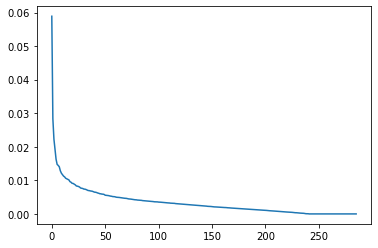

In [89]:
plt.plot(ratio)

In [90]:
CumSum=np.cumsum(ratio)

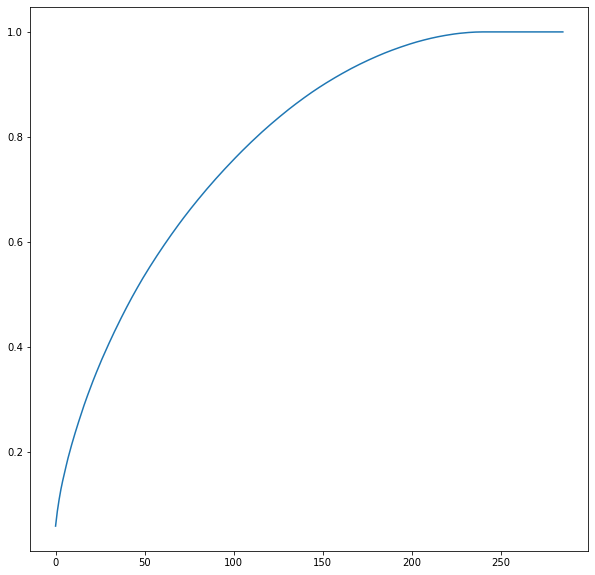

In [91]:
plt.figure(figsize=(10,10))
plt.plot(CumSum)

In [94]:
CumSum[214:216]

array([0.99016816, 0.99085729])

In [95]:
model= PCA(n_components=214)

In [96]:
model=model.fit_transform(X)

In [97]:
model=pd.DataFrame(model)

In [100]:
Linear=LR()

In [102]:
trainx,testx,trainy,testy=train_test_split(model,Y,test_size=0.2,random_state=100)

In [103]:
modelt=Linear.fit(trainx,trainy)

In [104]:
predy=modelt.predict(testx)

In [105]:
predy=pd.DataFrame(predy)

In [109]:
modelt.score(testx,predy)

1.0

In [110]:
mse(testy,predy,squared=False)

317032.7744690611

In [112]:
modelt.score(trainx,trainy)

0.9278855163502833

In [113]:
modelf=Linear.fit(model,Y)

In [115]:
modelf.score(model,Y)

0.9200491568771925